In [0]:
# !pip install kaggle-cli
# !kg download -u name -p pw -c bike-sharing-demand
# !ls

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("train.csv")
data.drop(['casual', 'registered'], axis=1, inplace=True)

# #1 SUper dummy

In [0]:
y = data['count']
X = data.drop(['datetime', 'count'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=17)

In [0]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_valid_sc = scaler.transform(X_valid)

In [0]:
reg = SGDRegressor(random_state=17)
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_valid_sc)
y_pred_train = reg.predict(X_train_sc)
metrics.mean_squared_error(y_valid, y_pred), \
metrics.mean_squared_error(y_train, y_pred_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


(24641.986227088124, 24172.171135094603)

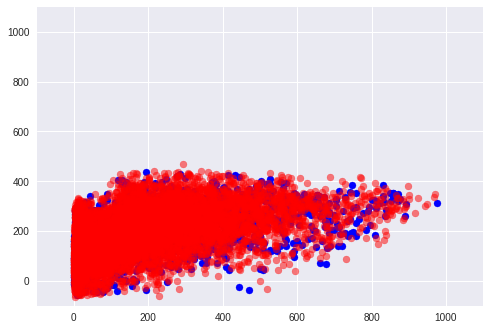

In [0]:
plt.xlim(-100,1100)
plt.ylim(-100,1100)
plt.scatter(y_valid, y_pred, c='blue')
plt.scatter(y_train, y_pred_train, c='red', alpha=0.5)

# #2 с категориальными признаками

In [0]:
def code_date(df):
    df['datetime'] = df.datetime.astype('datetime64[ns]')
    df['year'] = df.datetime.apply(lambda x: x.year)
    df['month'] = df.datetime.apply(lambda x: x.month)
    df['day'] = df.datetime.apply(lambda x: x.day)
    df['weekday'] = df.datetime.apply(lambda x: x.weekday())
    df['hour'] = df.datetime.apply(lambda x: x.hour)
    
code_date(data)
X = data.drop(['datetime', 'count'], axis=1)
X['weather'] = X['weather'].map(lambda x: 3 if x >= 3 else x) # "случайно" заметил, что только одна строка содержит значение 4

X = pd.concat([
    X.drop(["season", 'weather', 'month', 'weekday', 'day'], axis=1), # day вообще по идее не информативный
    pd.get_dummies(X['season'], prefix='season'),
    pd.get_dummies(X['weather'], prefix='weather'),
    pd.get_dummies(X['month'], prefix='month'),
    pd.get_dummies(X['weekday'], prefix='weekday'),
], axis=1)

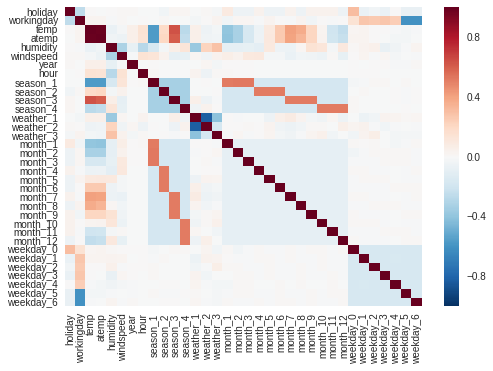

In [0]:
sns.heatmap(X.corr())

In [0]:
X = X.drop(['temp', 'weather_1'], axis=1)

y = data['count']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=17)

In [0]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_valid_sc = scaler.transform(X_valid)

In [0]:
reg = SGDRegressor(random_state=17)
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_valid_sc)
y_pred_train = reg.predict(X_train_sc)
metrics.mean_squared_error(y_valid, y_pred), \
metrics.mean_squared_error(y_train, y_pred_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


(20177.393707933814, 19801.9459947048)

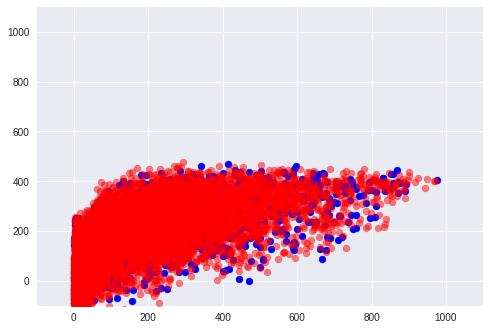

In [0]:
plt.xlim(-100,1100)
plt.ylim(-100,1100)
plt.scatter(y_valid, y_pred, c='blue')
plt.scatter(y_train, y_pred_train, c='red', alpha=0.5)

Ну такое

# \#3 попытка

In [0]:
X['sin_hour'] = np.sin(2*np.pi*data['hour']/24)
X['cos_hour'] = np.cos(2*np.pi*data['hour']/24)
X.drop('holiday', axis=1, inplace=True) # мало единичек и на боксплотах нет разницы между 0 и 1

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=17)
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_valid_sc = scaler.transform(X_valid)

In [0]:
reg = SGDRegressor(random_state=17)
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_valid_sc)
y_pred_train = reg.predict(X_train_sc)
metrics.mean_squared_error(y_valid, y_pred), \
metrics.mean_squared_error(y_train, y_pred_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


(16331.481378007084, 15879.016047885301)

Опа

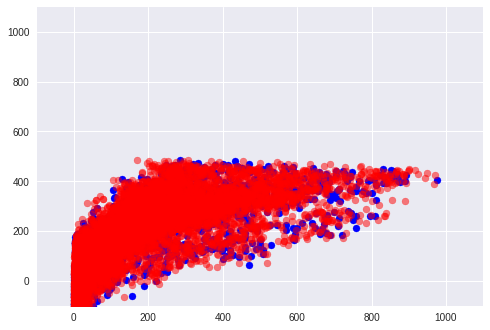

In [0]:
plt.xlim(-100,1100)
plt.ylim(-100,1100)
plt.scatter(y_valid, y_pred, c='blue')
plt.scatter(y_train, y_pred_train, c='red', alpha=0.5)

In [0]:
from pprint import pprint
print(f"intercept: {reg.intercept_}")
pprint({x:y for x, y in zip(X.columns, reg.coef_)})

intercept: [191.67640146]
{'atemp': 27.4014430312997,
 'cos_hour': -69.29194846267032,
 'hour': 18.040425264889645,
 'humidity': -10.492721562433132,
 'month_1': -11.71123071289885,
 'month_10': 7.427288772056591,
 'month_11': 5.930894574869496,
 'month_12': -3.476989969498366,
 'month_2': -8.402480552180313,
 'month_3': -1.5919109146051102,
 'month_4': -9.019425843694414,
 'month_5': 7.107931733616239,
 'month_6': 6.675563532355536,
 'month_7': 3.59248441091953,
 'month_8': 0.5864093325922428,
 'month_9': 2.6914567344366427,
 'season_1': -13.816101768078534,
 'season_2': 2.9562799010329077,
 'season_3': 4.384178827263894,
 'season_4': 6.3747163353679115,
 'sin_hour': -52.91005326774208,
 'weather_2': -8.220203686576157,
 'weather_3': -21.621417662969954,
 'weekday_0': -2.477786005935294,
 'weekday_1': -1.5979251741156624,
 'weekday_2': 3.945695294303479,
 'weekday_3': 3.4513661193684815,
 'weekday_4': 2.5430047563463845,
 'weekday_5': 0.8236884599345787,
 'weekday_6': -6.8355450060322

Потюним

In [0]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps = [('scaling', scaler), ('regression', reg)])

param_grid = {
    'regression__loss' : ['huber', 'squared_loss'],
    'regression__n_iter' : [ 5, 10, 20], 
    'regression__penalty' : ['l1', 'l2', 'none', 'elasticnet'],
    'regression__alpha' : [0.0001, 0.001, 0.1],
}

grid_cv = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error',
                       n_jobs=-1, cv=4)

In [0]:
%%time
grid_cv.fit(X_train, y_train)

CPU times: user 1.04 s, sys: 49.8 ms, total: 1.09 s
Wall time: 17.1 s


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss=...om_state=17, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'regression__loss': ['huber', 'squared_loss'], 'regression__n_iter': [5, 10, 20], 'regression__penalty': ['l1', 'l2', 'none', 'elasticnet'], 'regression__alpha': [0.0001, 0.001, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [0]:
grid_cv.best_params_ 

{'regression__alpha': 0.1,
 'regression__loss': 'squared_loss',
 'regression__n_iter': 10,
 'regression__penalty': 'l1'}

In [0]:
reg = grid_cv.best_estimator_.fit(X_train_sc, y_train)

y_pred = reg.predict(X_valid_sc)
y_pred_train = reg.predict(X_train_sc)
metrics.mean_squared_error(y_valid, y_pred), \
metrics.mean_squared_error(y_train, y_pred_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(16153.592570279128, 15744.459639811777)

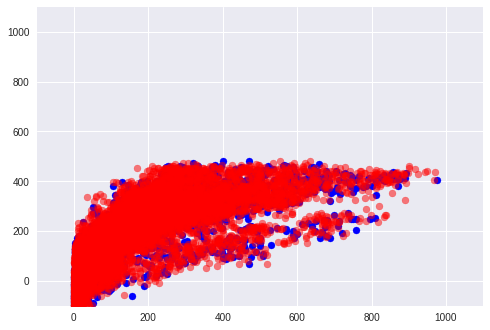

In [0]:
plt.xlim(-100,1100)
plt.ylim(-100,1100)
plt.scatter(y_valid, y_pred, c='blue')
plt.scatter(y_train, y_pred_train, c='red', alpha=0.5)

Ну не особо это чего-то дало

# \#4 Target encoding (да я otmorozok)

In [0]:
code_date(data)
X = data.drop(['datetime', 'count', 'holiday', 'atemp'], axis=1)
X['weather'] = X['weather'].map(lambda x: 3 if x >= 3 else x)

for col in ['season', 'workingday', 'weather', 'year', 'month', 'day', 'weekday', 'hour']:
    unique = X[col].unique()
    means = {}
    for u in unique:
        means[u] = y[X[col] == u].mean()
    X[col] = X[col].apply(lambda u: means[u])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=17)
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_valid_sc = scaler.transform(X_valid)

reg = SGDRegressor(random_state=17, alpha=0.1, penalty='l1', n_iter=10)
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_valid_sc)
y_pred_train = reg.predict(X_train_sc)
metrics.mean_squared_error(y_valid, y_pred), \
metrics.mean_squared_error(y_train, y_pred_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(10210.612593586457, 10279.099685496167)

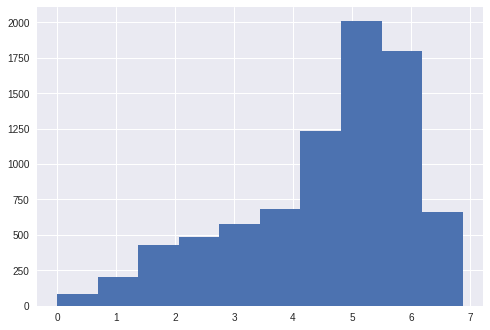

In [0]:
q = np.log(y_train)
q.hist()

Но на самом деле здесь за успех отвечает только кодинг hour, остальные в сумме дают ~200 MSE (уменьшение)

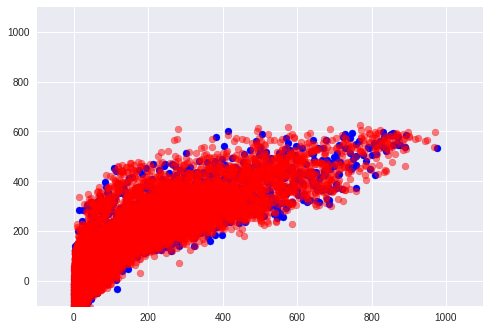

In [0]:
plt.xlim(-100,1100)
plt.ylim(-100,1100)
plt.scatter(y_valid, y_pred, c='blue')
plt.scatter(y_train, y_pred_train, c='red', alpha=0.5)

In [0]:
print(f"intercept: {reg.intercept_}")
pprint({x:y for x, y in zip(X.columns, reg.coef_)})

intercept: [191.79781162]
{'day': 6.218272602525169,
 'hour': 127.71058264695452,
 'humidity': -9.472779385697562,
 'month': 39.02656721747672,
 'season': 0.0,
 'temp': 15.948025392445988,
 'weather': 18.125907537178897,
 'weekday': 5.010927920652137,
 'windspeed': -3.875957821407114,
 'workingday': 0.0,
 'year': 46.10782887712567}
